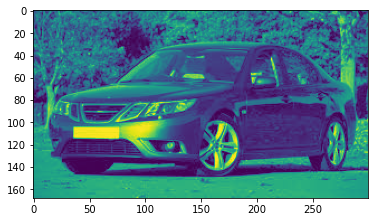

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('car.jpg',0)
plt.imshow(img)

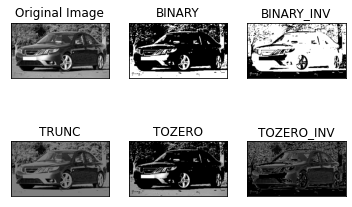

In [4]:
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

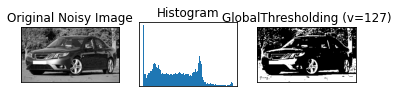

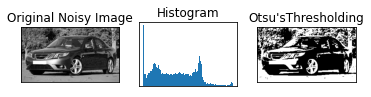

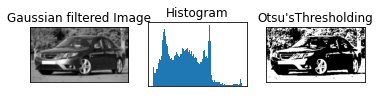

In [6]:
img = cv.imread('car.jpg',0)
# globalthresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,img, 0, th2,blur, 0, th3]
titles = ['Original Noisy Image','Histogram','GlobalThresholding (v=127)','Original Noisy Image','Histogram',"Otsu'sThresholding",'Gaussian filtered Image','Histogram',"Otsu'sThresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
    plt.show()

In [16]:
from __future__ import print_function
import random as rng
%matplotlib

def display(pic,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    myplot = fig.add_subplot(111)
    myplot.imshow(pic,cmap='gray')

img = cv.imread('apple.jpg')
#img.shape
plt.imshow(img)
display(img)

Using matplotlib backend: Qt5Agg


In [17]:
threshold =100
canny_output = cv.Canny(img, threshold, threshold * 2)
contours, hierarchy = cv.findContours(canny_output, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(len(contours))

337


In [18]:
count=0
font = cv.FONT_HERSHEY_SIMPLEX
for c in contours:
    x,y,w,h = cv.boundingRect(c)
    if (w >20 and h >20):
        count = count+1
        ROI = img[y+int(h/4):y+int(3*h/4), x+int(h/4):x+int(3*h/4)]
        ROI_meancolor =cv.mean(ROI)
        print(count,ROI_meancolor)
        if (ROI_meancolor[0] > 30 and ROI_meancolor[0] < 40 and ROI_meancolor[1] > 70 and ROI_meancolor[1] < 105 and ROI_meancolor[2] > 150 and ROI_meancolor[2] < 200):
            cv.putText(img, 'orange', (x-2, y-2), font, 0.8, (255,255,255), 2, cv.LINE_AA)
            cv.rectangle(img,(x,y),(x+w,y+h),(255,255,255),3)
            cv.imshow('Contours', img)
        else:
            cv.putText(img, 'apple', (x-2, y-2), font, 0.8, (0,0,255), 2, cv.LINE_AA)
            cv.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
            cv.imshow('Contours', img)

1 (111.25694444444444, 149.63194444444443, 195.3125, 0.0)
2 (146.99652777777777, 132.73958333333331, 209.9409722222222, 0.0)
3 (155.02704164413197, 203.4624121146566, 199.87398593834507, 0.0)
4 (49.18080357142857, 188.63010204081633, 152.14508928571428, 0.0)
5 (122.08896982310095, 118.43938605619148, 228.55489073881375, 0.0)
6 (189.79338842975207, 197.61983471074382, 239.67768595041323, 0.0)
7 (150.7810650887574, 217.8284023668639, 207.42011834319527, 0.0)
8 (121.6525, 213.01500000000001, 188.7425, 0.0)
9 (185.38757396449705, 170.44378698224853, 231.8905325443787, 0.0)
10 (237.82015306122446, 248.55612244897958, 247.50127551020407, 0.0)
11 (51.14876033057851, 130.29752066115702, 210.13223140495867, 0.0)
12 (24.953703703703702, 18.91358024691358, 212.35802469135803, 0.0)
13 (95.94444444444444, 204.52083333333331, 178.79166666666666, 0.0)
14 (59.06122448979591, 141.34693877551018, 193.1530612244898, 0.0)
15 (78.33163265306122, 78.6938775510204, 214.55612244897958, 0.0)
16 (121.9662629757

In [19]:
from skimage.feature import hog
from skimage import data, exposure
fruit, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1), visualize=True, multichannel=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
cv.imshow('HOG_image', hog_image_rescaled)
cv.imshow('HOG_image', hog_image_rescaled)